In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from IPython.core.pylabtools import figsize
import scipy.stats as stats
%matplotlib inline
figsize(12.5,4)

#import seaborn as sns; sns.set_context('notebook')
#figsize=(45,10)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

#1D
##comparing different covariance functions

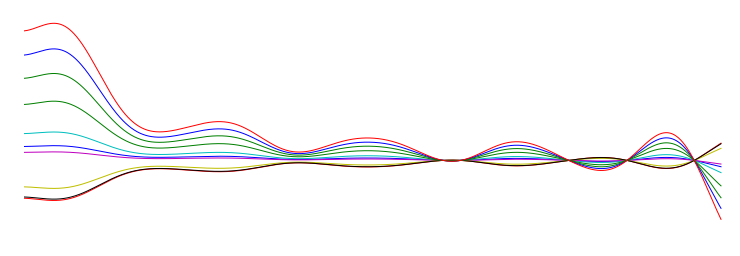

In [5]:
#np.random.seed(42)

value='c'
x = np.array([10,10,9])
y= np.array([1,2,10])
c=1
kernel = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'e': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'e2': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}[value]
if value=='f':
    start = -1
else:
    start = 0
x = np.linspace(start,1,1000)
n = len(x)
C = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        C[i,j] = kernel(x[i],x[j])

num_ = 100
dist = stats.norm
u = dist.rvs(0,1,(num_,1))[::10]

a, s, b = np.linalg.svd(C, full_matrices=True)
for i in range(len(u)):
    tmp = a.dot(np.sqrt(s))*u[i].T
    plt.plot(tmp.T);
    
plt.axis('off')
plt.savefig('boobie2.pdf')

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


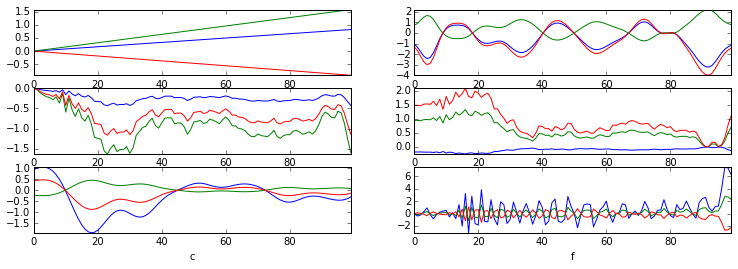

In [3]:
np.random.seed(42)

value='c'
x = np.array([10,10,9])
y= np.array([1,2,10])
c=1

kernels = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'periodic': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'semi-periodic': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}

x = np.linspace(start,1,100)
n = len(x)
C = np.zeros((n,n))

list_ = [x for x in kernels.keys()]


for k,value in enumerate(list_):
    sx = plt.subplot(len(list_)/2,2,k)
    plt.xlabel(value) 
    
    
    kernel = kernels[value]
    if value=='f':
        start = -1
    else:
        start = 0

    for i in range(n):
        for j in range(n):
            C[i,j] = kernel(x[i],x[j])

    num_ = 300
    dist = stats.norm
    u = dist.rvs(0,1,(num_,1))[::100]

    a, s, b = np.linalg.svd(C, full_matrices=True)
    for i in range(len(u)):
        tmp = a.dot(np.sqrt(s))*u[i].T
        plt.plot(tmp.T,label= u[i][0:2]);

        #leg = plt.legend()
        #leg.get_frame().set_alpha(0.4)
        plt.autoscale(tight=True)

##sampling

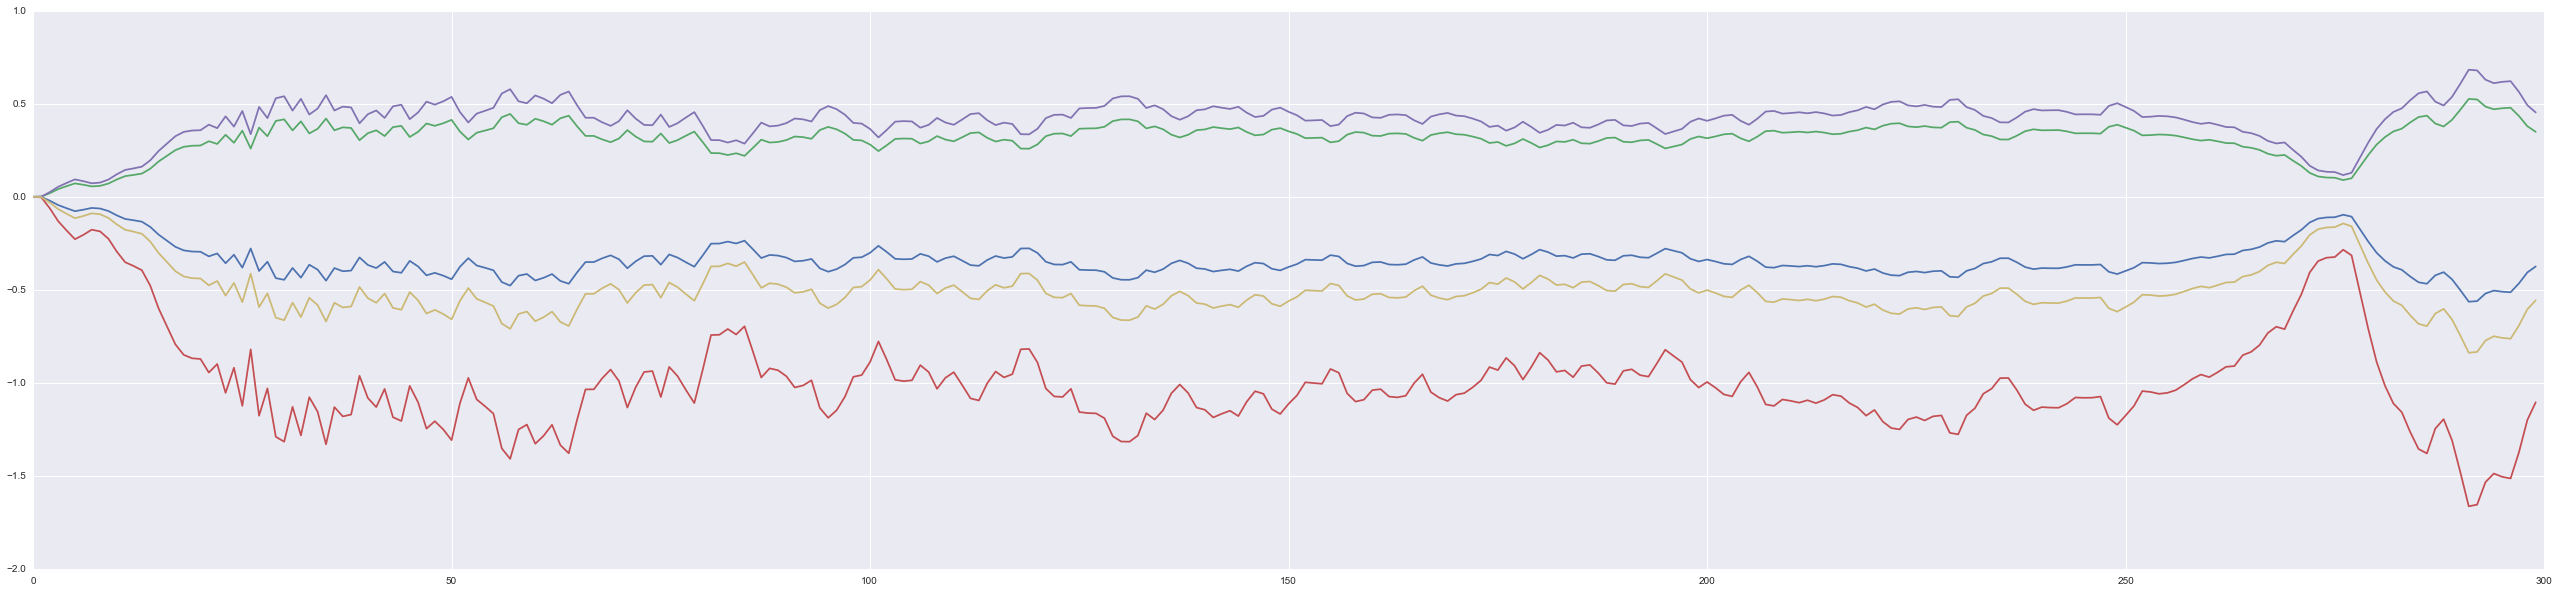

In [4]:
np.random.seed(42)

       

value='brownian'
x = np.array([10,10,9])
y= np.array([1,2,10])
c=1
kernel = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'e': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'e2': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}[value]
if value=='f':
    start = -1
else:
    start = 0
x = np.linspace(start,1,300)
n = len(x)
C = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        C[i,j] = kernel(x[i],x[j])
        
        

num_ = 50
dist = stats.norm
u = dist.rvs(0,1,(num_,1))[::10]
plt.figure(figsize=(45,10))

a, s, b = np.linalg.svd(C, full_matrices=True)
for i in range(len(u)):
    tmp = a.dot(np.sqrt(s))*u[i].T
    plt.plot(tmp.T);
    
    
    
    
    
    
    
    
    
    
    


(-2, 1)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


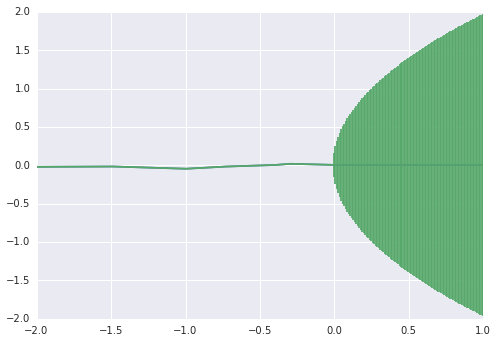

In [37]:
x = np.linspace(-2,1,300)
n = len(x)
value='b'
sigma_n = 0.1
errorf = lambda x,y: sigma_n**2*(x==y)#.all() #for vetors

x_o = [-1.5,-1.,-.75,-.4,-.3,.0]
y_o = [-1.6,-1.3,-.5,.0,.3,.6]
m = len(x_o)
k = np.zeros((len(x_o),len(x_o))) 
for i in range(m):
    for j in range(m):
        k[i,j] = kernel(x_o[i],x_o[j])
        
k_ss = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        k_ss[i,j] = kernel(x[i],x[j]) + errorf(x[i],x[j]) 
        
        

        
        
k_s = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        k_s[i,j]= kernel(x[i],x_o[j])
        
        
k.shape,k_ss.shape,k_s.shape

tmp,_,_,_ = np.linalg.lstsq(k_s.T,k)
mu = tmp.dot(np.atleast_2d(y_o).T)
sigma = 1.96*np.sqrt(np.diag(k_ss-
                             tmp.dot(k_s.T)))
plt.plot(x,mu)
plt.errorbar(x,mu,yerr=sigma)
#plt.scatter(x_o,y_o)

#regress

plt.xlim([-2,1]);



from http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section5_1-Gaussian-Processes.ipynb

In [38]:
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
exponential_kernel = lambda x,y,params: params[0]* np.exp(-.5 *params[1] * np.sum((x-y)**2))

In [39]:
x = np.array([1,2,3])
y = 1-x

In [40]:
covariance = lambda kernel,x,y,params: np.array([[kernel(xi,yi,params) for xi in x] for yi in y])

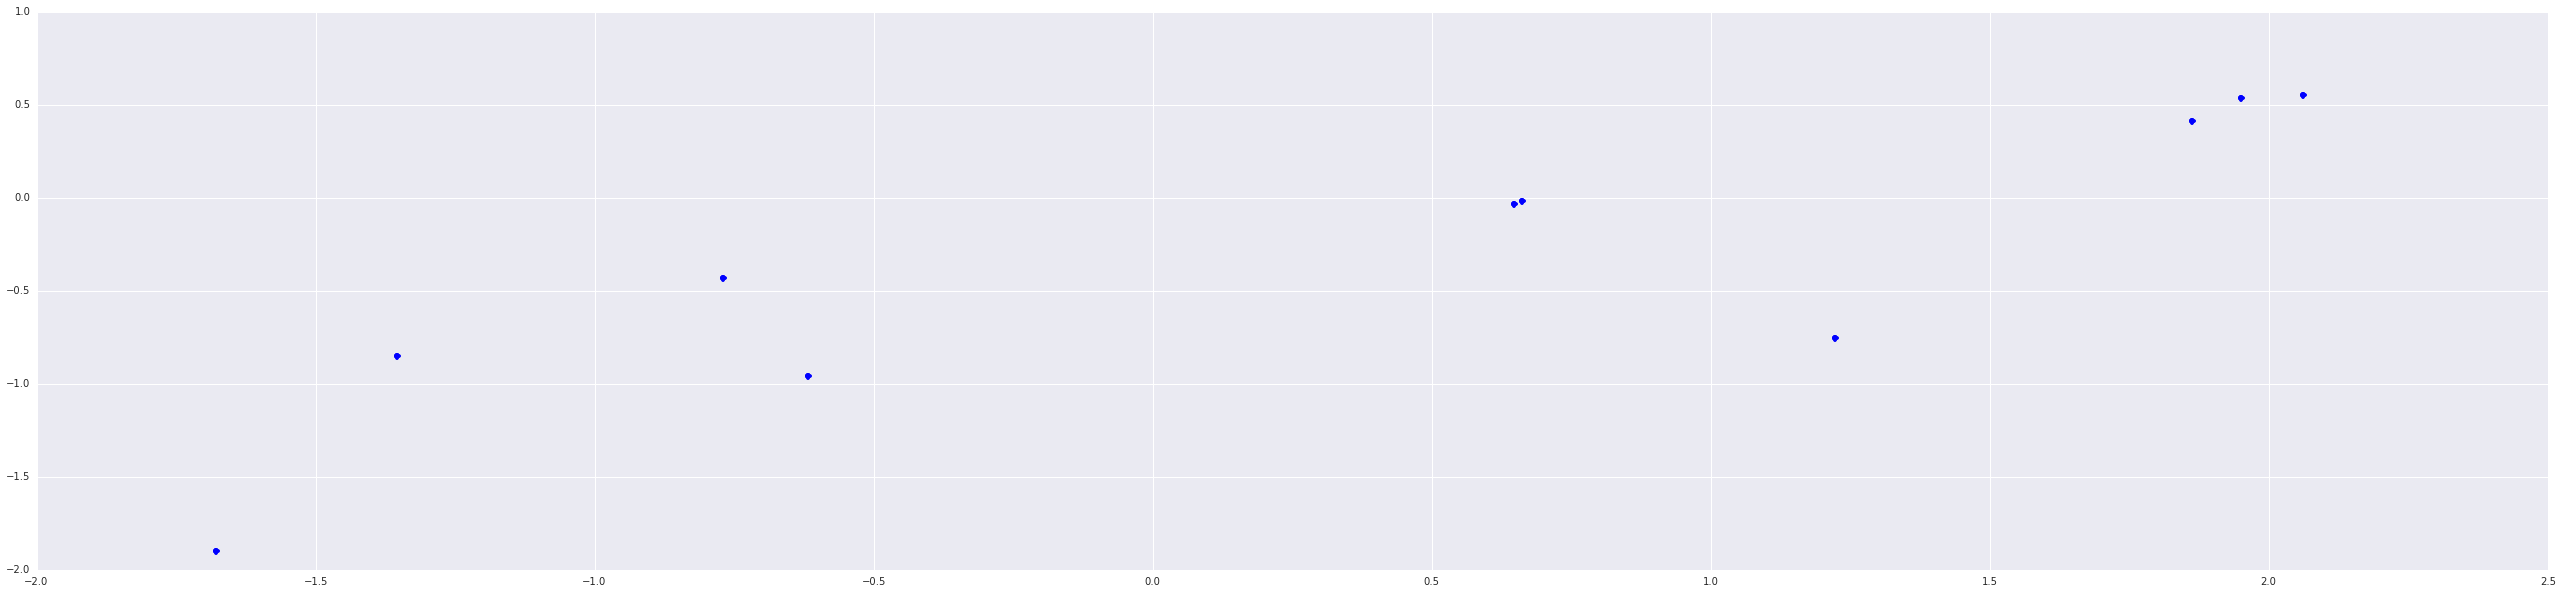

In [41]:
x = np.random.randn(10)*2
theta = [1,10]
sigma = covariance(exponential_kernel,x,x,theta)
y = np.random.multivariate_normal(np.zeros(len(x)),sigma)
plt.figure(figsize=(45,10))

plt.plot(x,y,'bo')

In [42]:
exponential_kernel(x,y,theta)

3.1770010456816512e-26

In [43]:

def conditional(x_new, x, y, fcov=exponential_kernel, params=theta):
    B = covariance(fcov, x_new, x, params)
    C = covariance(fcov, x, x, params)
    A = covariance(fcov, x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B).T.dot(y)
    sigma = A - np.linalg.inv(C).dot(B).T.dot(B)
    return mu.squeeze(), sigma.squeeze()

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


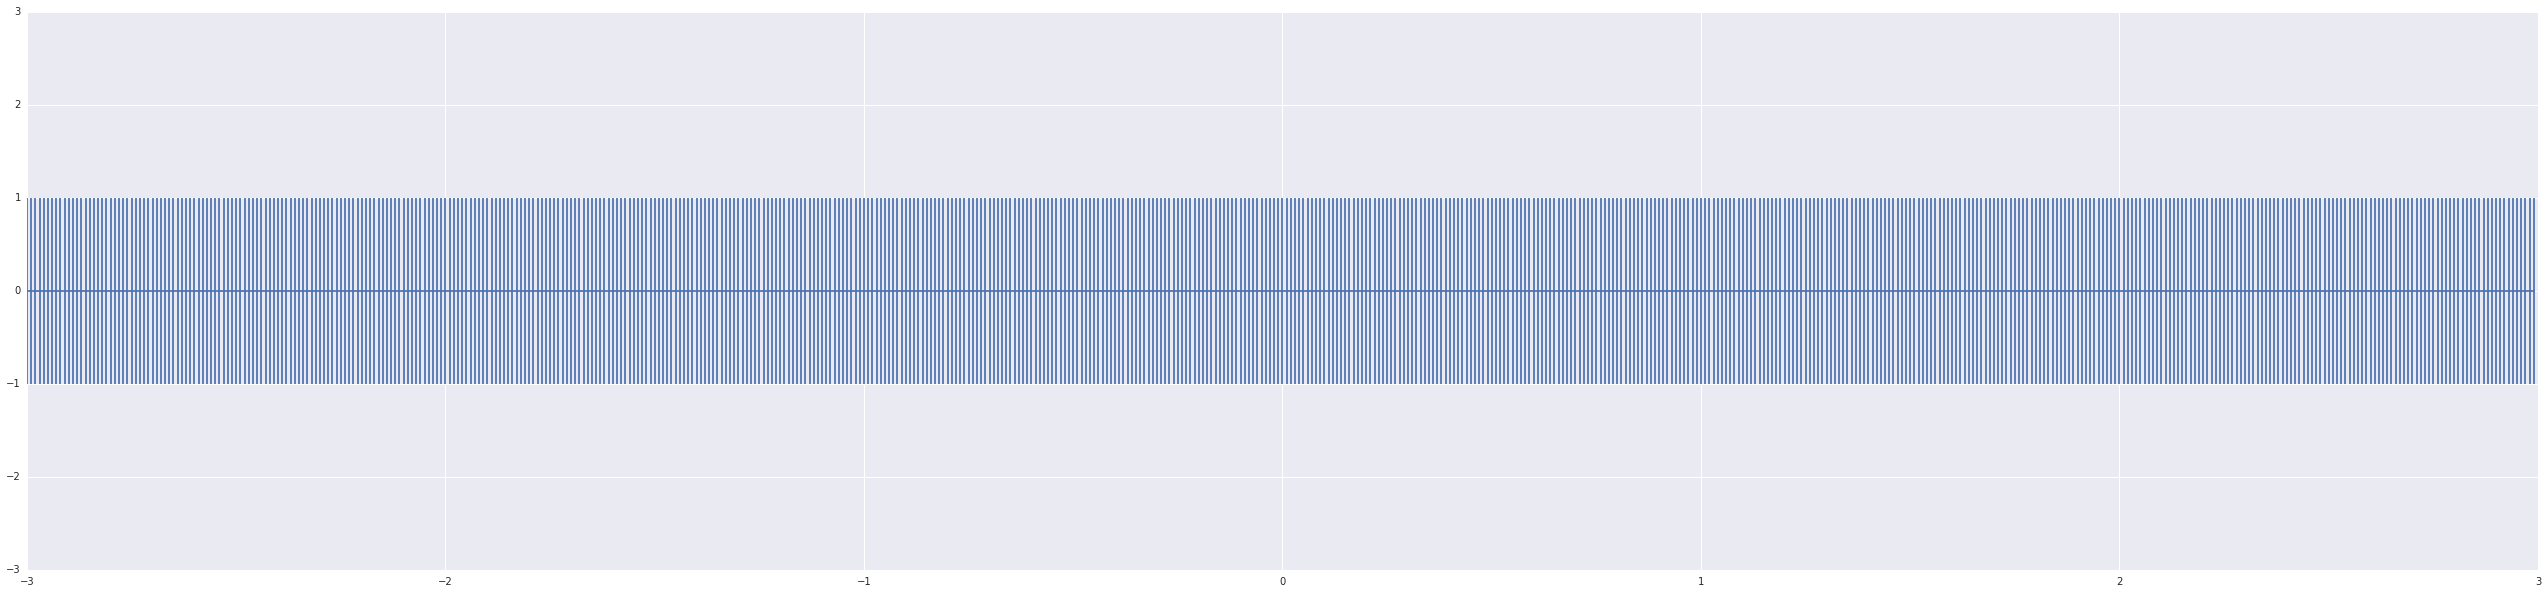

In [44]:
sigma0 = exponential_kernel(0,0,theta)
xpts = np.arange(-3,3,step=.01)

plt.figure(figsize=(45,10))

plt.errorbar(xpts,np.zeros(len(xpts)),yerr=sigma0,capsize=0)

plt.ylim(-3,3);

In [45]:
x = [1.]
y = [np.random.normal(scale=sigma0)]
y

[0.36139560550841393]

In [46]:
sigma1 = covariance(exponential_kernel,x,x,theta)

In [47]:
def predict(x,data,kernel,params,sigma,t):
    k = [kernel(x,y,params)for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k,Sinv).dot(t)
    sigma_new = kernel(x,x,params) - np.dot(k,Sinv).dot(k)
    return y_pred, sigma_new

In [48]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_kernel, theta, sigma1, y) 
               for i in x_pred]

In [49]:
np.array(predictions).shape

(1000, 2)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


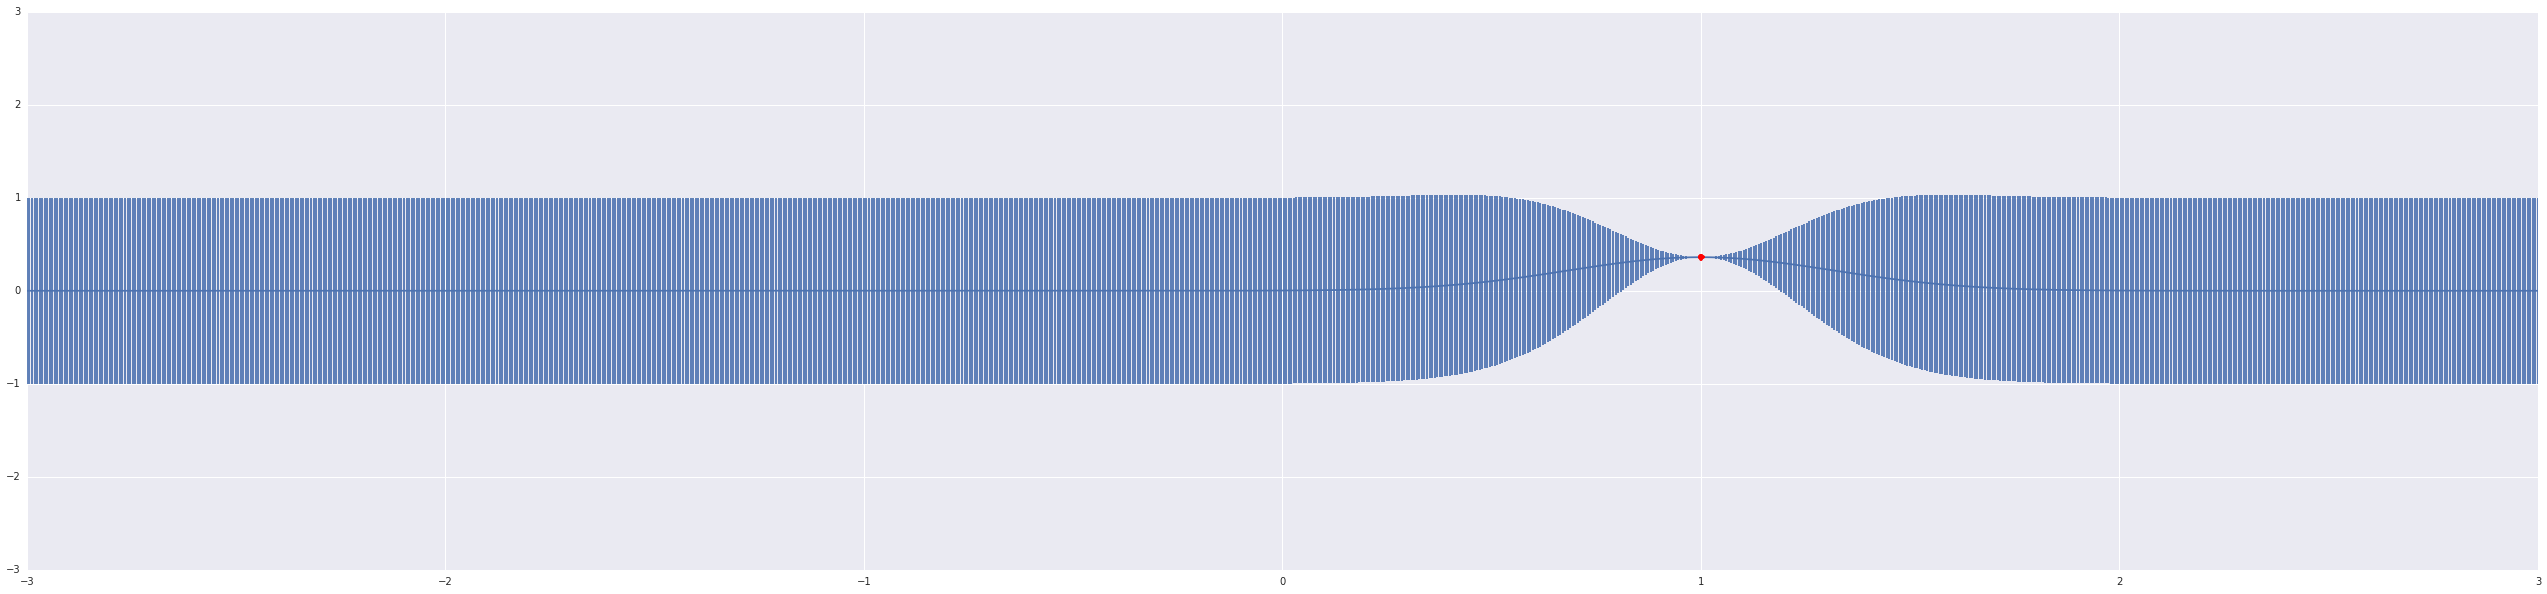

In [50]:
y_pred,sigmas = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred,y_pred,yerr=sigmas,capsize=0)
plt.plot(x,y,'ro')
plt.xlim(-3,3);
plt.ylim(-3,3);

In [51]:
mu2, s2 = conditional([-0.7], x, y)
y2 = np.random.normal(mu2, s2)
y2

1.5380367580796988

In [52]:
x.append(-0.7)
y.append(y2)

In [53]:
sigma2 = covariance(exponential_kernel, x, x, theta)


In [54]:
predictions = [predict(i, x, exponential_kernel, theta, sigma2, y) 
               for i in x_pred]

(-3, 3)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


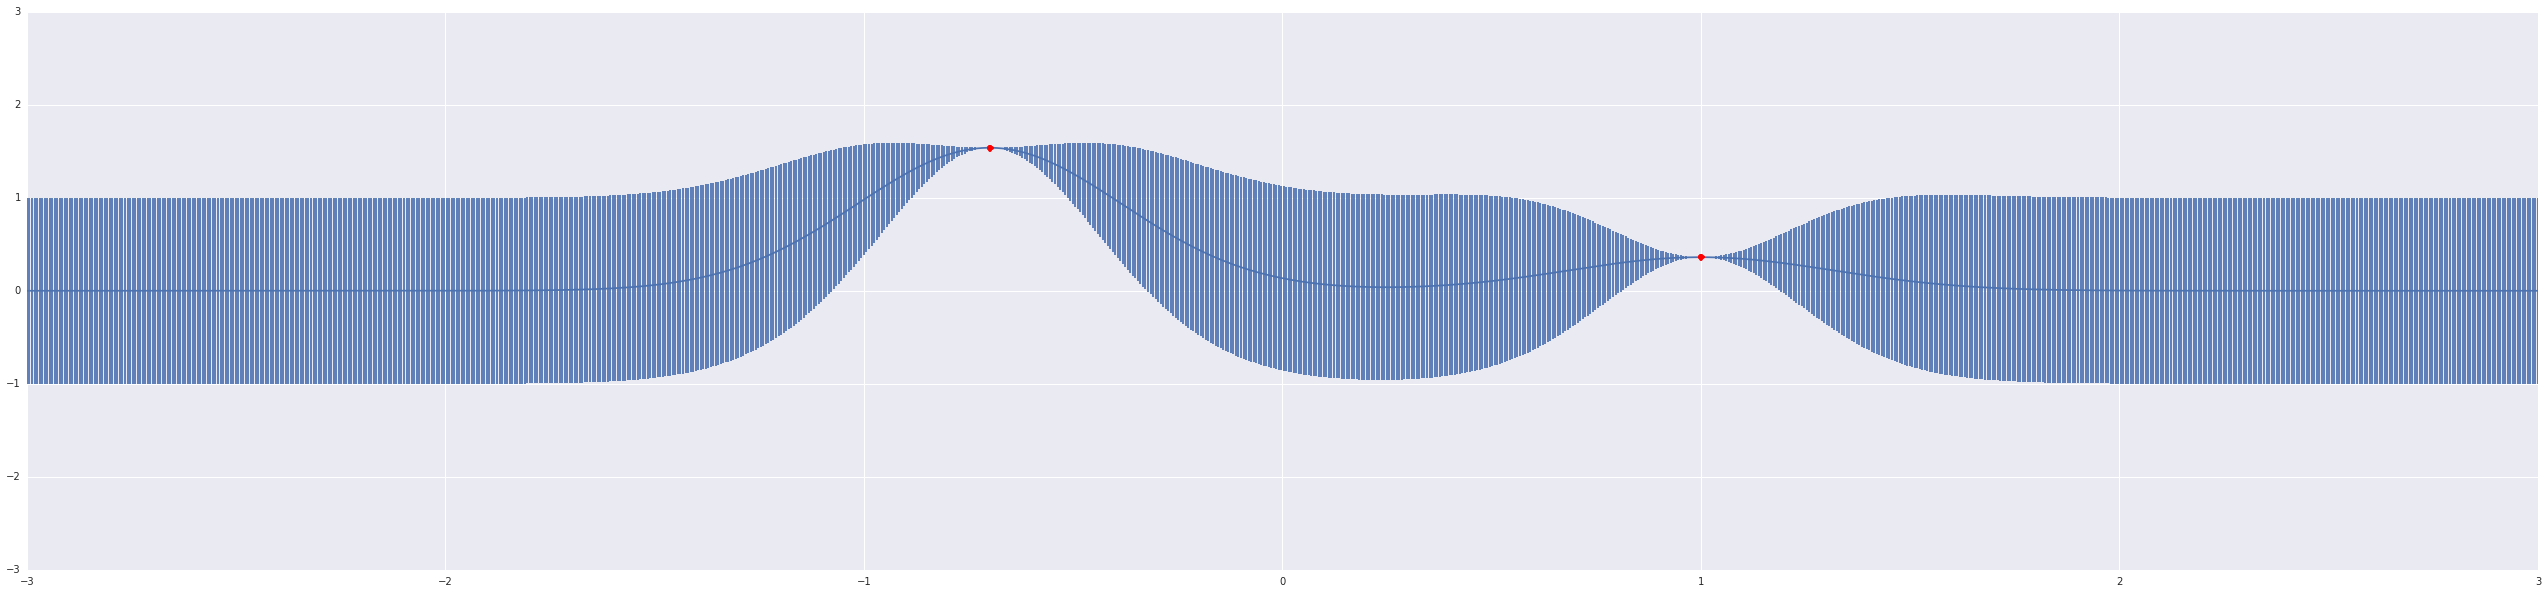

In [55]:

y_pred, sigmas = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3)

In [56]:
x_more = [-2.1, -1.5, 0.3, 1.5, 2.5]
mu, s = conditional(x_more, x, y)
y_more = np.random.multivariate_normal(mu, s)
y_more
x += x_more
y += y_more.tolist()

In [57]:
x_more = [0,1.8]
mu, s = conditional(x_more, x, y)
y_more = np.random.multivariate_normal(mu, s)
y_more
x += x_more
y += y_more.tolist()


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


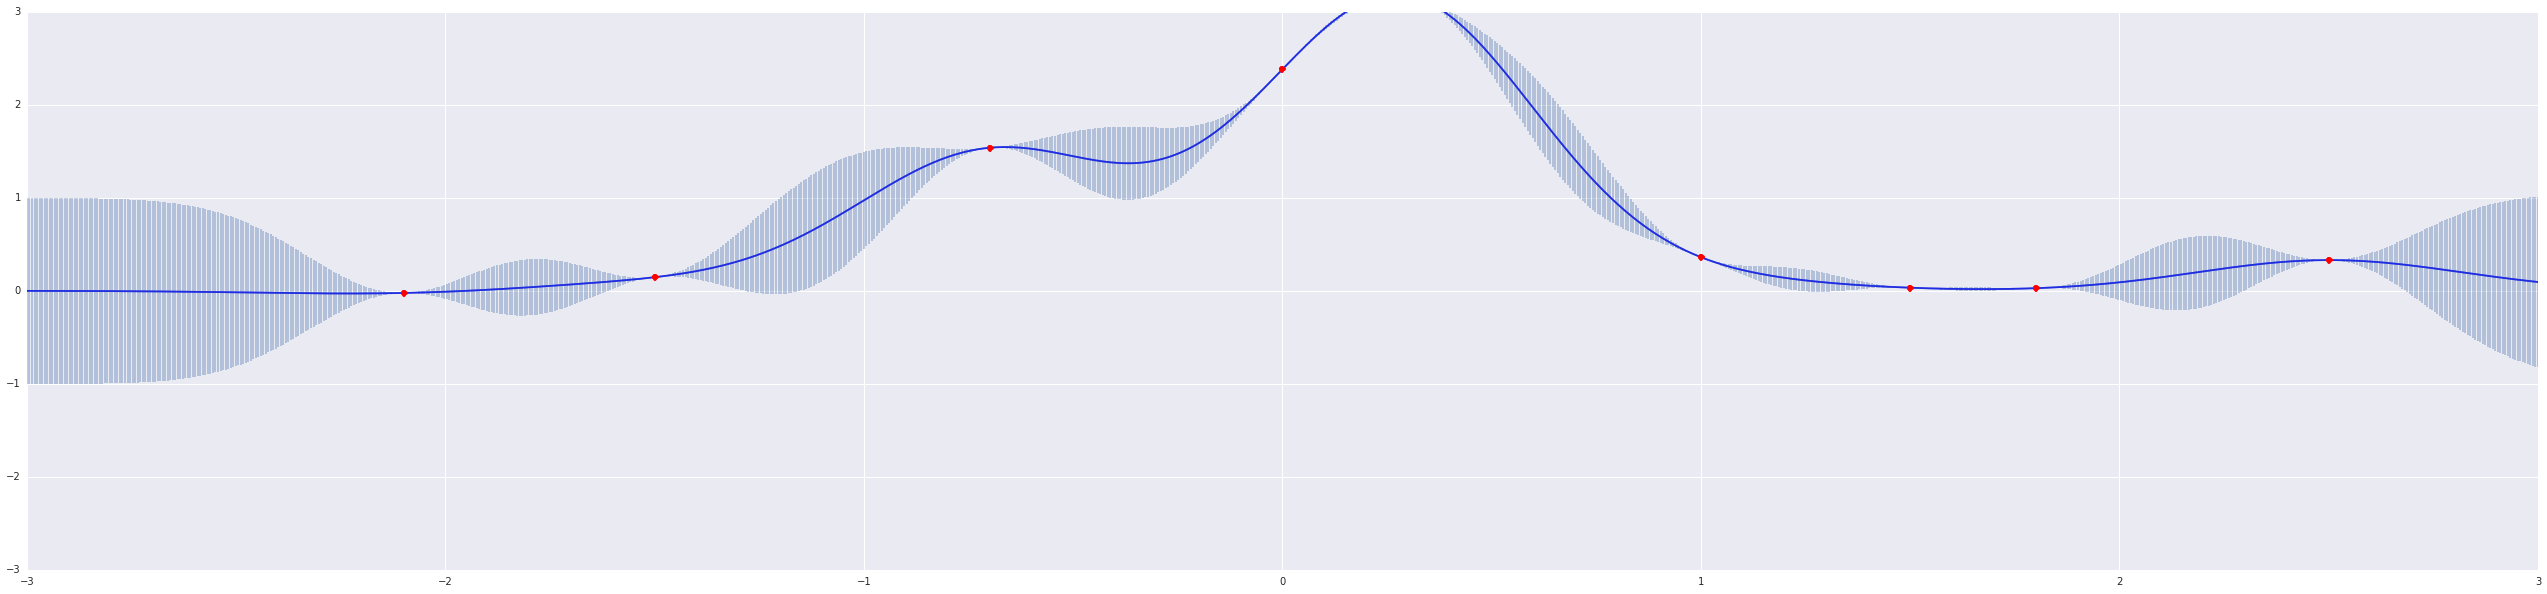

In [58]:

sigma_new = covariance(exponential_kernel, x, x, theta)

predictions = [predict(i, x, exponential_kernel, theta, sigma_new, y) 
               for i in x_pred]

y_pred, sigmas = np.transpose(predictions)

plt.figure(figsize=(45,10))

plt.plot(x_pred, y_pred,color='b')
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0,alpha=.4)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

In [59]:

# Exponential kernel, plus constant and linear terms
exponential_linear_kernel = lambda x, y, params: \
    exponential_kernel(x, y, params[:2]) + params[2] + params[3] * np.dot(x, y)

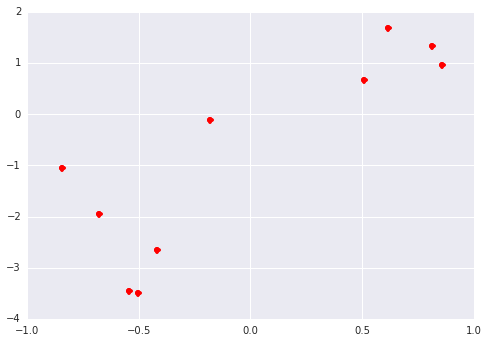

In [60]:
# Parameters for the expanded exponential kernel
theta = 2.0, 50.0, 0.0, 1.0

# Some sample training points.
xvals = np.random.rand(10) * 2 - 1

# Construct the Gram matrix
C = covariance(exponential_linear_kernel, xvals, xvals, theta)

# Sample from the multivariate normal
yvals = np.random.multivariate_normal(np.zeros(len(xvals)), C)

plt.plot(xvals, yvals, "ro")

In [61]:

x_pred = np.linspace(-1, 1, 1000)
predictions = [predict(i, xvals, exponential_linear_kernel, theta, C, yvals) 
               for i in x_pred]

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


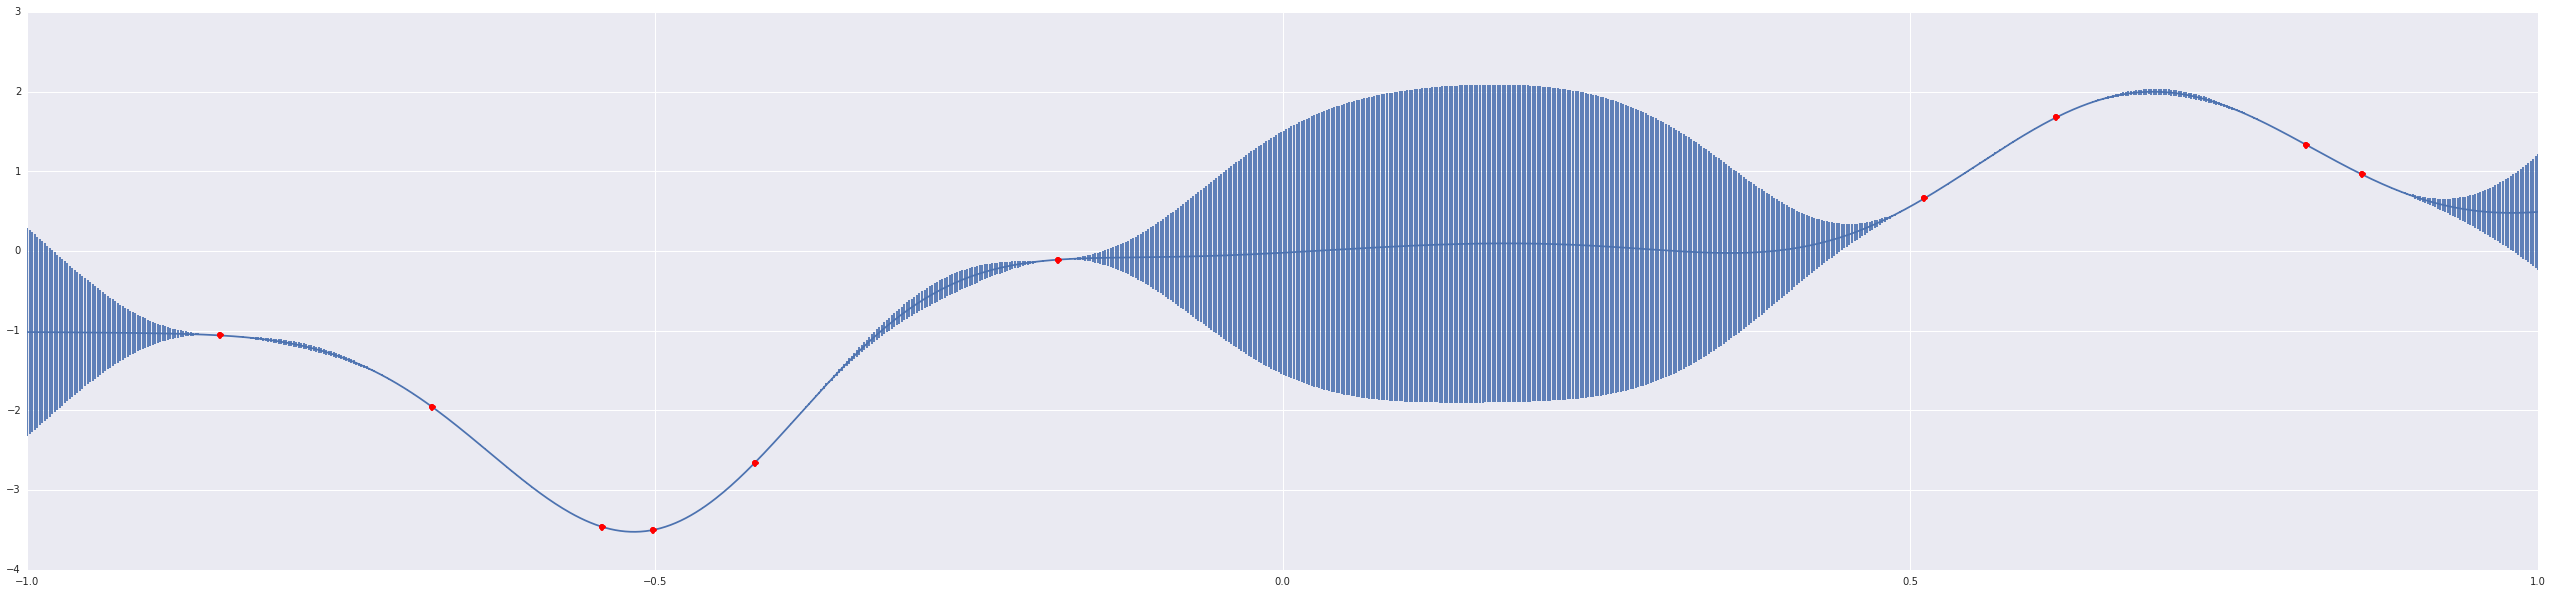

In [62]:
y, sigma = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred, y, yerr=sigma, capsize=0)
plt.plot(xvals, yvals, "ro")

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


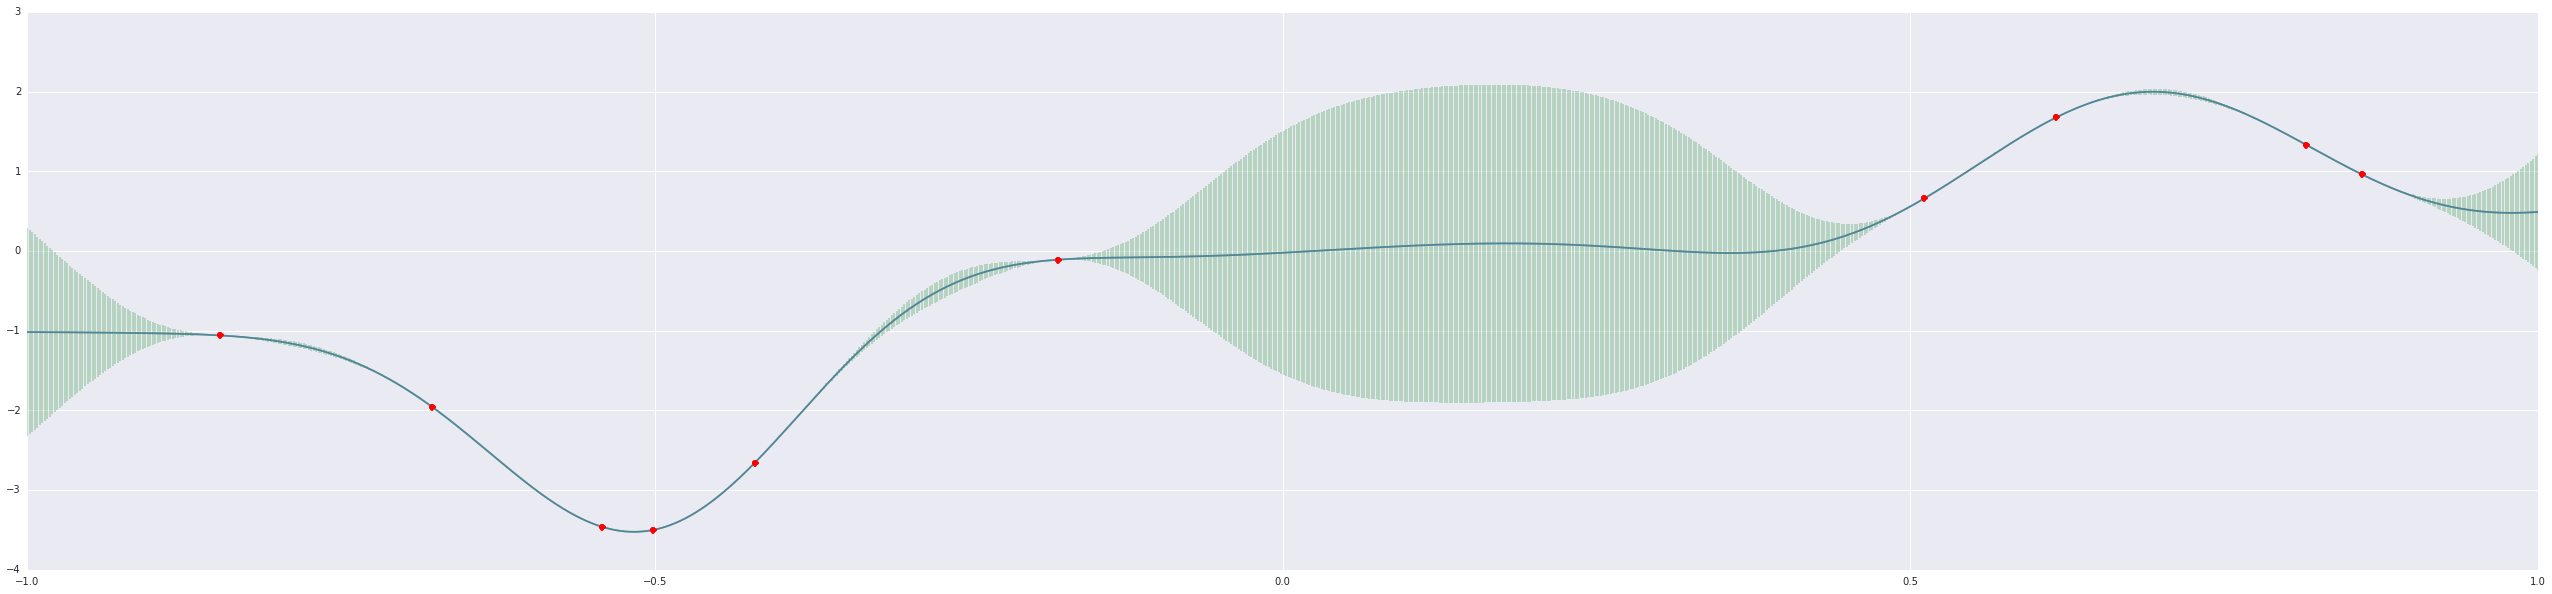

In [63]:

y, sigma = np.transpose(predictions)
plt.figure(figsize=(45,10))
plt.plot(x_pred, y)
plt.errorbar(x_pred, y, yerr=sigma, capsize=0,alpha=.4)
plt.plot(xvals, yvals, "ro")